# Análise do IDEB 2019 - Ensino Médio

## Índice

<ul>
    <li>Introdução
    <li>Manipulação dos dados
    <li>Análise de Dados
    <li>Conclusões</li>
</ul>

## Introdução
O Indicador de Desenvolvimento da Educação Básica (IDEB) é o principal indicador da educação básica no Brasil. Ele é calculado para os seguntes níveis: escola, município, estado e Brasil.
O obejtivo do SAEB é identificar ao longo do tempo se mais alunos estão frequentando as escolas e se esses alunos que frequentam estão aprendendo mais. <br>
Para isso o indicador relaciona os resultados do SAEB e de fluxo, sendo que a avaliação do SAEB é aplicada a cada dois anos para as turmas de 5º ano dos Anos Iniciais, 9º ano dos Anos Finais e 3ª e 4ª série do Ensino Médio. <br>
Para o Ensino Médio, o SAEB passou a ser censitário a partir de 2017 e assim temos os resultados por escola apenas de 2017 e 2019. 

<br>
<br>

<b> SG_UF - </b> 	Sigla do estado <br>
<b> CO_MUNICIPIO - </b> 	Código IBGE do município <br>
<b> NO_MUNICIPIO - </b> Nome do município <br>
<b> ID_ESCOLA	- </b> Código INEP da escola <br>
<b> REDE - </b> Dependência administrativa da escola (Municipal, Estadual, Privada) <br>
<b> VL_INDICADOR_REND_2017	- </b> Indicador de rendimento 2017 (Fluxo) <br>
<b> VL_INDICADOR_REND_2019	- </b> Indicador de rendimento 2019 (Fluxo) <br>
<b> VL_NOTA_MEDIA_2017	- </b> Nota padronizada 2017 (SAEB) <br>
<b> VL_NOTA_MEDIA_2019	- </b> Nota padronizada 2019 (SAEB) <br>
<b> VL_OBSERVADO_2017		- </b> Resultado do IDEB 2017 (SAEB) <br>
<b> VL_OBSERVADO_2019	- </b> Resultado do IDEB 2019 (SAEB) <br>
<b> VL_PROJECAO_2019 - </b> Meta do IDEB 2019 (SAEB) <br>

---

## Manipulação dos dados

Antes de iniciar o tratamento dos dados, uma observação prévia utilizando do excel permitiu definir quais colunas seriam utilizados nessa análise. <br>
Um importante passo no tratamento dos dados consistiu na remoção das escolas sem resultado divulgado, o que é definido pelo INEP como critério, a participação de no mínimo 80% dos estudantes da escola. Essa restrição existe para que controlar um possível problema de poucos alunos da escola realizarem a prova e essa amostra ser pouco representativa. <br>
Na base original, escolas sem resultados recebem o valor "-", o que também exigiu um tratamento para que os indicadores fossem transformados no tipo numérico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('/content/drive/My Drive/Educação/SAEB 2019/divulgacao_ensino_medio_escolas_2019.xlsx')

In [2]:
df.loc[:,'VL_INDICADOR_REND_2017'] = pd.to_numeric(df.loc[:,'VL_INDICADOR_REND_2017'], errors='coerce')
df.loc[:,'VL_INDICADOR_REND_2019'] = pd.to_numeric(df.loc[:,'VL_INDICADOR_REND_2019'], errors='coerce')
df.loc[:, 'VL_NOTA_MEDIA_2017'] = pd.to_numeric(df.loc[:,'VL_NOTA_MEDIA_2017'], errors='coerce')
df.loc[:,'VL_NOTA_MEDIA_2019'] = pd.to_numeric(df.loc[:,'VL_NOTA_MEDIA_2019'], errors='coerce')
df.loc[:, 'VL_OBSERVADO_2017'] = pd.to_numeric(df.loc[:,'VL_OBSERVADO_2017'], errors='coerce')
df.loc[:, 'VL_OBSERVADO_2019'] = pd.to_numeric(df.loc[:,'VL_OBSERVADO_2019'], errors='coerce')
df.loc[:,'VL_PROJECAO_2019'] = pd.to_numeric(df.loc[:,'VL_PROJECAO_2019'], errors='coerce')

In [3]:
ideb = df.loc[:,['SG_UF','CO_MUNICIPIO','NO_MUNICIPIO','ID_ESCOLA','REDE','VL_INDICADOR_REND_2017','VL_INDICADOR_REND_2019',
          'VL_NOTA_MEDIA_2017','VL_NOTA_MEDIA_2019','VL_OBSERVADO_2017','VL_OBSERVADO_2019','VL_PROJECAO_2019']]

In [4]:
ideb_2019 = ideb.dropna(subset = ['VL_OBSERVADO_2019'])

---
## Análise de Dados

### Percentual de escolas com resultado divulgado



In [5]:
ideb_2019.shape[0]/ideb.shape[0]

0.5833011396561715

Comparando o tamanho da base completa com a base de escolas com resultados divulgados, podemos chegar a conclusão que <b><i>58,3%</i> das escolas tiveram seus resultados divulgados</b>, o que é definido como critério uma participação mínima de 80% dos alunos na avaliação do SAEB.

### Estatísticas

In [6]:
ideb_2019.describe()

,CO_MUNICIPIO,ID_ESCOLA,VL_INDICADOR_REND_2017,VL_INDICADOR_REND_2019,VL_NOTA_MEDIA_2017,VL_NOTA_MEDIA_2019,VL_OBSERVADO_2017,VL_OBSERVADO_2019,VL_PROJECAO_2019
count,1.207900e+04,1.207900e+04,11497.000000,12079.000000,6692.000000,12079.000000,6692.000000,12079.000000,6692.000000
mean,3.184799e+06,3.181058e+07,0.852352,0.892792,4.459122,4.657422,3.935415,4.172986,4.149268
std,8.748289e+05,8.718608e+06,0.100394,0.085439,0.669153,0.673850,0.791066,0.804079,0.781281
min,1.100015e+06,1.100026e+07,0.242294,0.386894,1.350903,1.951648,1.100000,1.300000,1.200000
25%,2.606254e+06,2.606904e+07,0.791884,0.845394,4.003055,4.215383,3.400000,3.600000,3.600000
50%,3.167202e+06,3.125436e+07,0.866065,0.910990,4.416458,4.638441,3.900000,4.200000,4.100000
75%,3.548906e+06,3.540628e+07,0.929797,0.959401,4.843771,5.049680,4.400000,4.700000,4.600000
max,5.300108e+06,5.306809e+07,1.000000,1.000000,7.800014,7.774514,7.700000,7.700000,7.800000


### Percentual de escolas com meta batida

In [7]:
ideb_2019['VL_PROJECAO_2019'].isna().sum() / ideb_2019.shape[0]

0.445980627535392

In [8]:
meta_2019 = ideb_2019.dropna(subset = ['VL_PROJECAO_2019'])
(meta_2019['VL_OBSERVADO_2019'] >= meta_2019['VL_PROJECAO_2019']).mean()

0.6872384937238494

As metas das escola são definidas pelo INEP - seguindo uma tendência de aumentos marginalmente descrescentes (função logística). As metas são definidas até 2021, levando em consideração o primeiro resultado da escola. <br>
<i>44,6%</i> das unidades escolares não tinham meta estabelecida para 2019, em função de não terem resultado divulgado em 2017, ano em que o SAEB passou a ser censitário para o Ensino Médio.<br>
Das unidades escolares que tinham uma meta estabelecida e que tiveram resultado divulgado em 2019, <b><i>68%</i> conseguiram alcançar o resultado esperado.</b>

### Distribuição dos resultados 2019

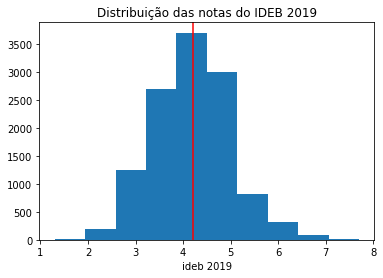

In [9]:
plt.hist(ideb_2019['VL_OBSERVADO_2019'])
plt.title('Distribuição das notas do IDEB 2019')
plt.xlabel('ideb 2019')
plt.axvline(ideb_2019['VL_OBSERVADO_2019'].median(), c= 'red')

A distribuição das notas segue uma distribuição próxima a distribuição normal, com uma grande concentração de escolas entre as notas 4 e 5.

### Desvio padrão por estado

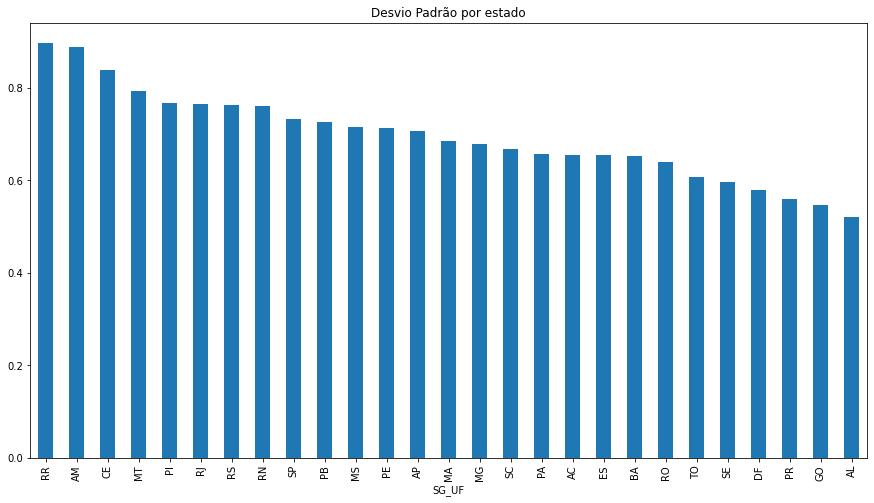

In [10]:
ideb_2019.groupby('SG_UF')['VL_OBSERVADO_2019'].std().sort_values(ascending=False).plot.bar(figsize=(15,8), title="Desvio Padrão por estado")

O desvio padrão é uma medidade de dispersão que sinaliza o quão próxima da média estão os dados. Aqui utilizamos o desvio padrão como uma sinalização para equidade dentro da rede, quanto maior o desvio padrão, mais observações distantes da média.

Text(0.5, 1.0, 'Fluxo x Aprendizagem')

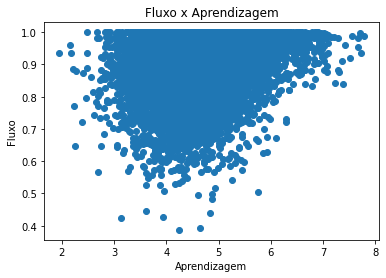

In [11]:
plt.scatter(ideb_2019['VL_NOTA_MEDIA_2019'],ideb_2019['VL_INDICADOR_REND_2019'])
plt.xlabel('Aprendizagem')
plt.ylabel('Fluxo')
plt.title("Fluxo x Aprendizagem")

### Junção com a base do Indicador de Nível Socioeconômico das Escolas de Educação Básica

Dado que variáveis socioeconômicas podem impactar os dados de frequencia e desempenho dos alunos nas avaliação, importante cruzar os dados do IDEB com indicadores que reflitam a realidade socioeconômica dos estudantes. Para isso,  utilizamos o Indicador de Nível Socioeconômico das Escolas de Educação Básica, o qual é disponibilizado pelo INEP e tem como mais recente publicação, a base do ano de 2015.

In [12]:
df_2 = pd.read_excel('/content/drive/My Drive/Educação/SAEB 2019/INSE_2015.xlsx')
inse = df_2.loc[:, ['CO_ESCOLA','INSE_VALOR_ABSOLUTO' ,'INSE_CLASSIFICACAO']]
inse.columns = ['ID_ESCOLA','INSE_VALOR_ABSOLUTO', 'INSE_CLASSIFICACAO']

In [13]:
inse['ID_ESCOLA'] = inse['ID_ESCOLA'].astype(int)

In [14]:
ideb_2019_inse = ideb_2019.merge(inse, on='ID_ESCOLA')

### Percentual de escolas sem meta projetada para 2019, conforme o grupo de classificação do INSE

In [49]:
inse_escolas = ideb.merge(inse, on='ID_ESCOLA')
sem_meta = pd.isnull(inse_escolas['VL_PROJECAO_2019'])
escolas_sem_meta = inse_escolas[sem_meta]

In [50]:
escolas_sem_meta.query('INSE_CLASSIFICACAO == "Grupo 1"').shape[0]/inse_escolas.query('INSE_CLASSIFICACAO == "Grupo 1"').shape[0]

0.23563218390804597

In [51]:
escolas_sem_meta.query('INSE_CLASSIFICACAO == "Grupo 2"').shape[0]/inse_escolas.query('INSE_CLASSIFICACAO == "Grupo 2"').shape[0]

0.41542699724517906

In [52]:
escolas_sem_meta.query('INSE_CLASSIFICACAO == "Grupo 3"').shape[0]/inse_escolas.query('INSE_CLASSIFICACAO == "Grupo 3"').shape[0]

0.5346616853466168

In [53]:
escolas_sem_meta.query('INSE_CLASSIFICACAO == "Grupo 4"').shape[0]/inse_escolas.query('INSE_CLASSIFICACAO == "Grupo 4"').shape[0]

0.6208801676509811

In [54]:
escolas_sem_meta.query('INSE_CLASSIFICACAO == "Grupo 5"').shape[0]/inse_escolas.query('INSE_CLASSIFICACAO == "Grupo 5"').shape[0]

0.4773462783171521

In [55]:
escolas_sem_meta.query('INSE_CLASSIFICACAO == "Grupo 6"').shape[0]/inse_escolas.query('INSE_CLASSIFICACAO == "Grupo 6"').shape[0]

0.4155844155844156

Grupo 1 - 23,56% <br>
Grupo 2 - 41,54% <br>
Grupo 3 - 53,46% <br>
Grupo 4 - 62,08% <br>
Grupo 5 - 47,73% <br>
Grupo 6 - 41,55% <br>

### Média por grupo de classificação do INSE

In [15]:
ideb_2019_inse.groupby('INSE_CLASSIFICACAO')['VL_OBSERVADO_2019'].mean()

INSE_CLASSIFICACAO
Grupo 1    4.022474
Grupo 2    4.060263
Grupo 3    4.129146
Grupo 4    4.470241
Grupo 5    5.126207
Grupo 6    6.875000
Name: VL_OBSERVADO_2019, dtype: float64

Observamos uma correlação positiva entre nível socioeconômico e o resultado do IDEB 2019, indicando que na média as escolas com nível socioeconômico maiores tem médias maiores de IDEB.

### Mediana por grupo de classificação do INSE

In [16]:
ideb_2019_inse.groupby('INSE_CLASSIFICACAO')['VL_OBSERVADO_2019'].median()

INSE_CLASSIFICACAO
Grupo 1    4.00
Grupo 2    4.00
Grupo 3    4.10
Grupo 4    4.40
Grupo 5    5.00
Grupo 6    6.65
Name: VL_OBSERVADO_2019, dtype: float64

### Desvio padrão por grupo de classificação do INSE

In [17]:
ideb_2019_inse.groupby('INSE_CLASSIFICACAO')['VL_OBSERVADO_2019'].std()

INSE_CLASSIFICACAO
Grupo 1    0.702103
Grupo 2    0.781685
Grupo 3    0.690266
Grupo 4    0.690597
Grupo 5    0.861572
Grupo 6    0.597016
Name: VL_OBSERVADO_2019, dtype: float64

### Distribuição das notas do IDEB por grupo do INSE

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dd6977978>,
      dtype=object)

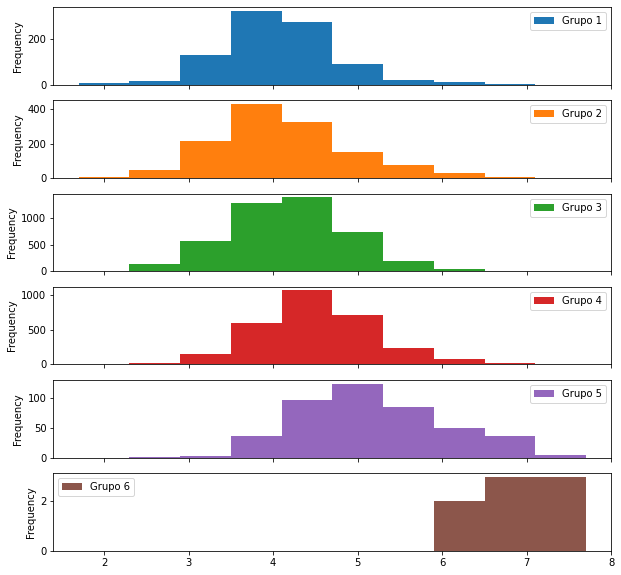

In [18]:
ideb_2019_inse.pivot(columns='INSE_CLASSIFICACAO', values='VL_OBSERVADO_2019').plot(kind='hist', subplots=True, figsize=(10,10))

Vale importante destaque para o grupo 6 (escolas com maior nível socioeconômico), o qual apresenta uma maior média nos resultados do IDEB e possui uma distribuição mais homogênea que nos outros grupos, mas possui uma amostra muito pequena nessa análise, com apenas oito escolas.

INSE x IDEB

Text(0, 0.5, 'IDEB')

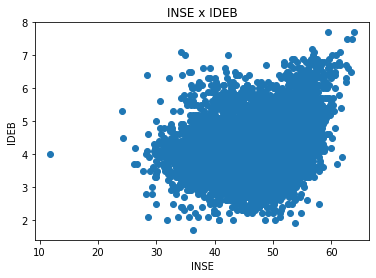

In [25]:
plt.scatter(ideb_2019_inse['INSE_VALOR_ABSOLUTO'],ideb_2019_inse['VL_OBSERVADO_2019'])
plt.title('INSE x IDEB')
plt.xlabel('INSE')
plt.ylabel('IDEB')

In [20]:
ideb_2019_inse.query('INSE_VALOR_ABSOLUTO < 20')

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,ID_ESCOLA,REDE,VL_INDICADOR_REND_2017,VL_INDICADOR_REND_2019,VL_NOTA_MEDIA_2017,VL_NOTA_MEDIA_2019,VL_OBSERVADO_2017,VL_OBSERVADO_2019,VL_PROJECAO_2019,INSE_VALOR_ABSOLUTO,INSE_CLASSIFICACAO
1457,CE,2307809,Marco,23007648,Estadual,0.949792,0.928687,3.623529,4.295947,3.4,4.0,3.7,11.75,Grupo 1


In [21]:
ideb_2019_inse.query('VL_OBSERVADO_2019 < 4').shape[0]

3466

Temos uma escola no município de Marco - CE com INSE igual a 11.75, mas que ainda assim possui um resultado no IDEB superior a outras 3466 escolas.

In [22]:
ideb_2019_inse.query('VL_OBSERVADO_2019 > 6 & INSE_VALOR_ABSOLUTO < 40').shape[0]

16

16 escolas possuem INSE inferior a 40, mas conseguiram IDEB superior a 6

---
## Conclusão

Fontes utilizadas:

<a href="http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados">Resultados do IDEB</a><br>
<a href="http://portal.inep.gov.br/indicadores-educacionais">Indicador de Nível Socioeconômico</a><br>
<a href="https://www.in.gov.br/web/dou/-/portaria-n%c2%ba-366-de-29-de-abril-de-2019-86232542">Portaria do SAEB</a>
